In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import band_count

In [2]:
data_dir = "./data/"
data_fn = data_dir + "cleaned_data.txt"
data_grey_fn = data_dir + "cleaned_grey_values.txt"
all_elements = pd.read_csv(data_fn)
print(all_elements.head())

   Distance (um)  Elapsed Time   B11_ppm  Na23_ppm  Mg25_ppm  Al27_ppm  \
0      -1.483983     -1.483983 -0.000987 -1.739987  1.252779 -1.428722   
1      -1.478071     -1.478071  0.273978 -0.963147  2.358353 -1.189735   
2      -1.472164     -1.472164 -0.041514 -1.274842  1.587131 -0.879393   
3      -1.466252     -1.466252  0.646814 -0.961113  1.437627 -1.582681   
4      -1.460344     -1.460344  0.151465 -1.214546  1.474992 -1.570397   

   Si28_ppm   P31_ppm   S34_ppm  Cl35_ppm  ...  Zn66_ppm  Zn68_ppm  Sr88_ppm  \
0 -1.030042  1.095407  0.576121 -1.078462  ...  1.409131  1.572304  1.231484   
1 -0.483173  1.588047  1.585102 -1.104329  ...  1.439062  1.372410  0.979279   
2 -0.694485  1.389658  0.317097 -0.880657  ...  1.674240  1.736563  0.941318   
3 -1.052700  1.525399 -0.236500 -1.136729  ...  1.628649  1.488895 -0.189878   
4 -1.296695  1.237596 -0.067184 -1.486543  ...  1.335298  1.297910  0.958900   

   Ba138_ppm  PbTotal_ppm     pixel  new_distance  new_pixel  case  sex  


In [3]:
grey_values = pd.read_csv(data_grey_fn)
grey_values = grey_values.iloc[::3]
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
3                   435    120.0393          3    43      4.787819   M
6                   438    120.3672          6    43      4.790547   M
9                   441    116.0331          9    43      4.753875   M
12                  444    110.2875         12    43      4.703091   M
...                 ...         ...        ...   ...           ...  ..
5670               1738     95.3029       1472    56      4.557060   F
5673               1741     97.4087       1475    56      4.578916   F
5676               1744    101.0177       1478    56      4.615296   F
5679               1747    104.6929       1481    56      4.631425   F
5682               1750    101.0000       1484    56      4.615121   F

[1895 rows x 6 columns]


In [4]:
elt_name = "Sr88_ppm" # "Cu65_ppm" # "Zn66_ppm" # "Mg25_ppm" # "S34_ppm" # 
elt_array = [
    all_elements[all_elements['case']==i][elt_name] for i in [43,44,55,56]
]
print([len(arr) for arr in elt_array])

[461, 320, 570, 711]


In [5]:
grey_array = [
    grey_values[grey_values['case']==i]["Gray_Value"] for i in [43,44,55,56]
]

In [6]:
scale_switch = 50
max_age = 40
mortality_rate = None # 0.1

394


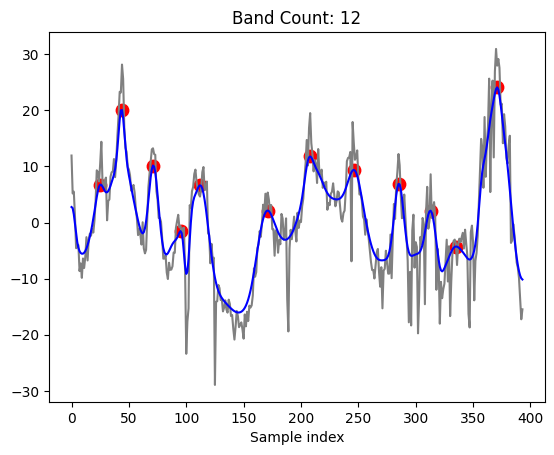

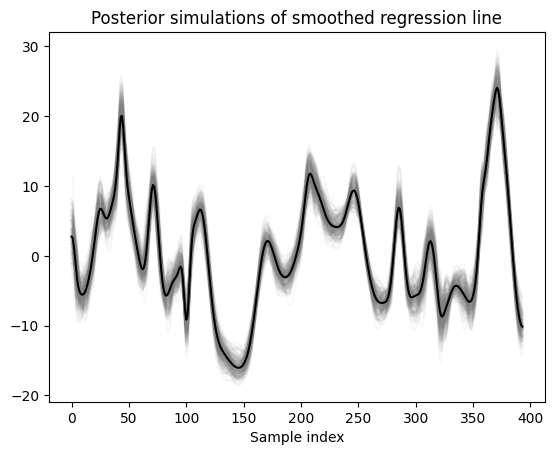

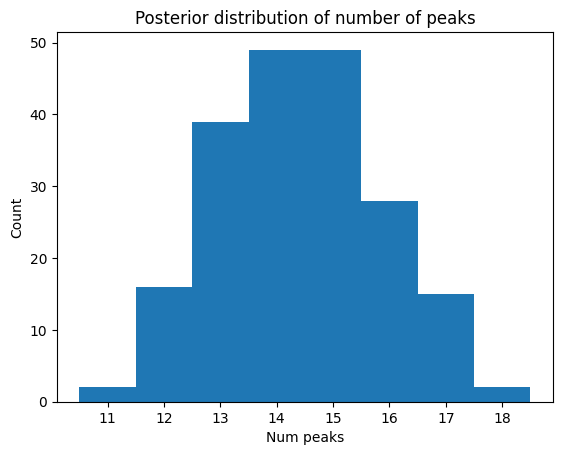

426


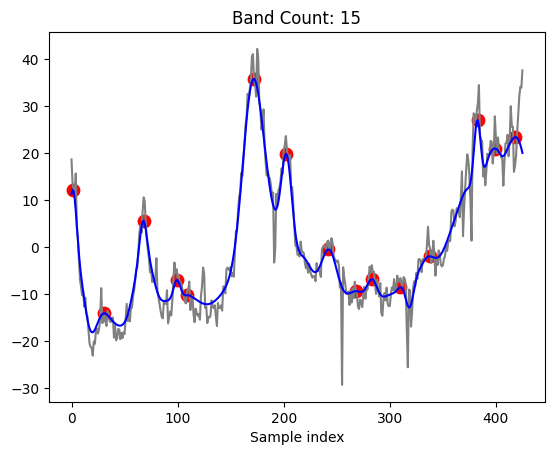

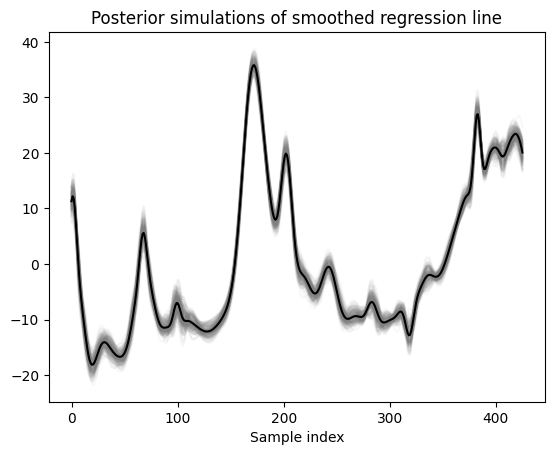

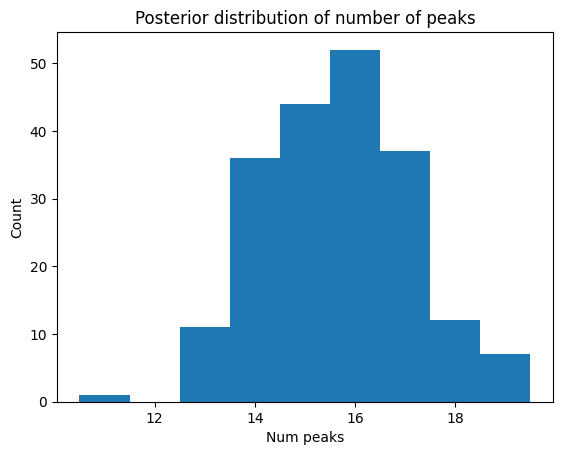

580


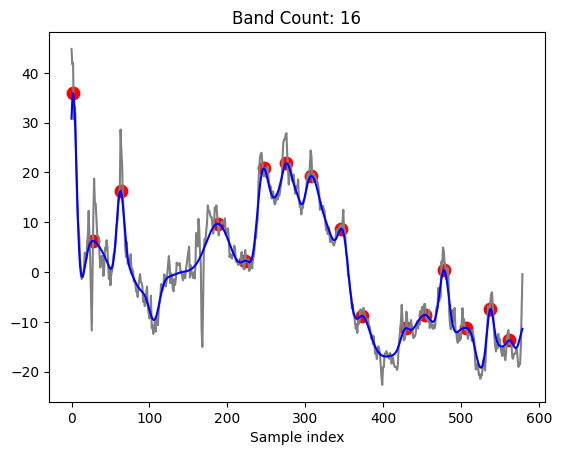

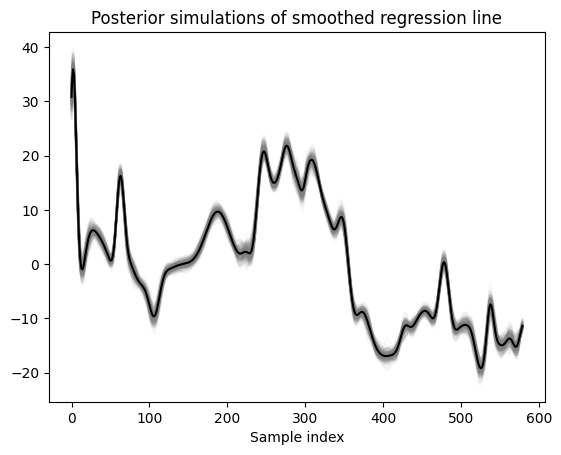

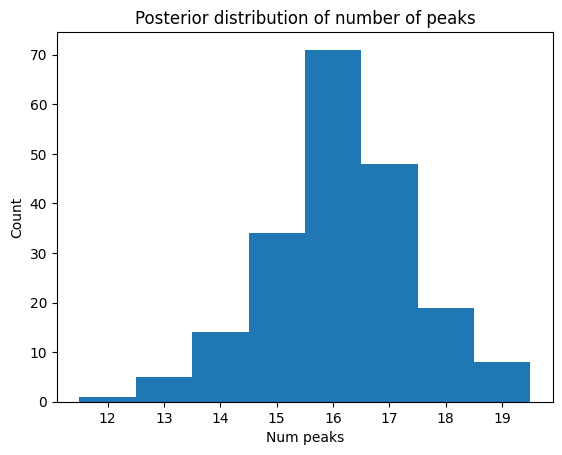

495


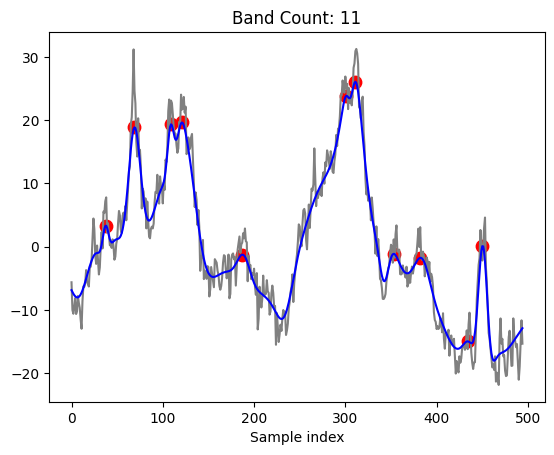

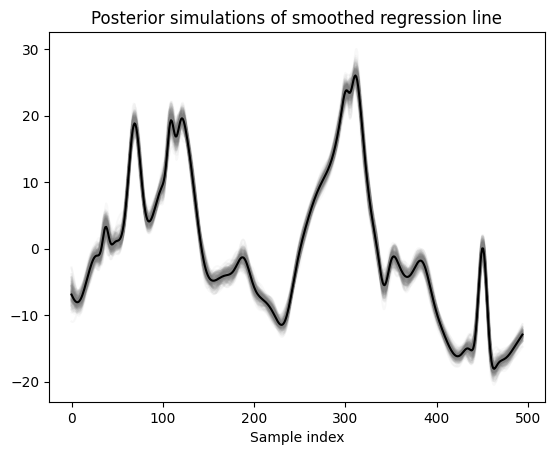

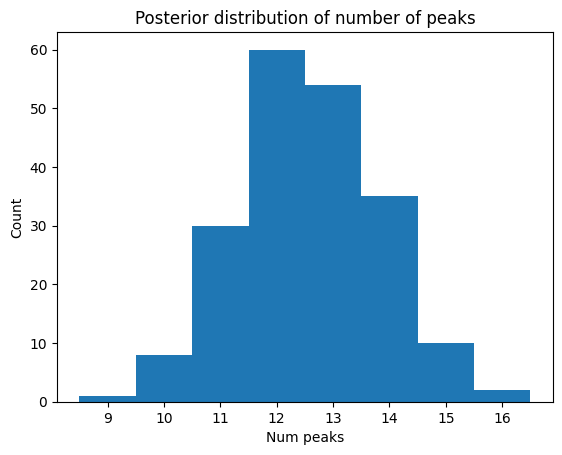

In [7]:
for i in range(len(grey_array)):
    print(len(grey_array[i]))
    counter = band_count.BandCounter(grey_array[i], max_age, mortality_rate, scale_switch)
    # p = counter.plot(filter=False)
    # plt.show()
    p = counter.plot(filter=True)
    plt.show()
    
    n_sim = 200
    locs, counts, smootheds = counter.get_count_distribution(n_sim, True)
    plt.plot(smootheds, color="grey", alpha=10/n_sim)
    plt.plot(counter.low_freq_smoothed.smoothed, color="black")
    plt.xlabel("Sample index")
    plt.title("Posterior simulations of smoothed regression line")
    plt.show()

    plt.figure()
    plt.hist(counts, bins=np.linspace(min(counts)-0.5, max(counts)+0.5, num=max(counts)-min(counts)+2))
    plt.xlabel("Num peaks")
    plt.ylabel("Count")
    plt.title("Posterior distribution of number of peaks")
    plt.show()

In [ ]:
# for i in range(len(elt_array)):
#     counter = band_count.BandCounter(elt_array[i], max_age, mortality_rate, scale_switch)
#     p = counter.plot(filter=False)
#     plt.show()
#     p = counter.plot(filter=True)
#     plt.show()